In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading Data
df = pd.read_csv('/content/winequalityN.csv')
df = df.drop('type',axis=1)
df = df.fillna(df.mean())
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
y = df['quality']
X = df.drop('quality',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [14]:
# Create Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [16]:
# Print Classification Report
y_pred = nb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.14      0.08      0.10        48
           5       0.49      0.56      0.52       399
           6       0.52      0.39      0.45       578
           7       0.39      0.63      0.48       228
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00         0

    accuracy                           0.46      1300
   macro avg       0.22      0.24      0.22      1300
weighted avg       0.45      0.46      0.45      1300



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

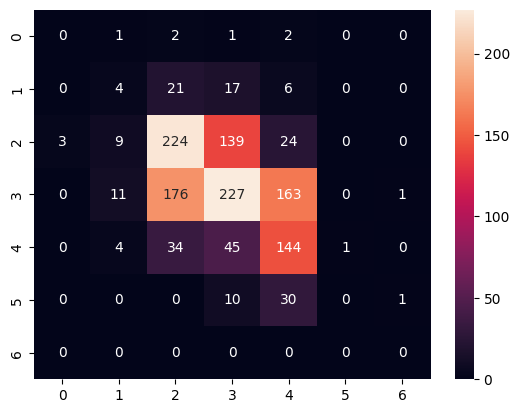

In [33]:
# Printing Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')


# cm = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion matrix')
# plt.show()


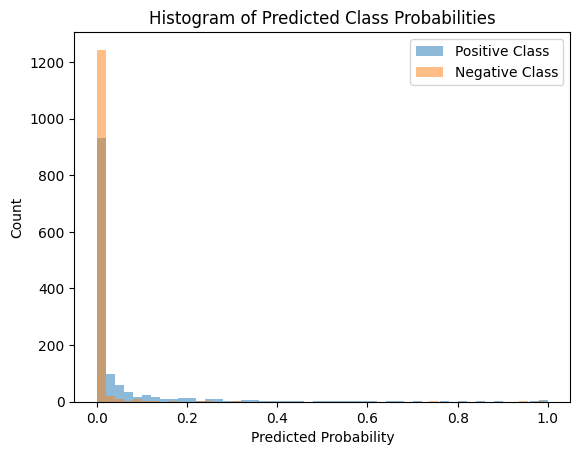

In [31]:
proba = nb.predict_proba(X_test)
plt.hist(proba[:, 1], bins=50, alpha=0.5, label='Positive Class')
plt.hist(proba[:, 0], bins=50, alpha=0.5, label='Negative Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of Predicted Class Probabilities')
plt.show()